### START HERE IF SOURCING FROM df_manual_FOR_training
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


# Descriptives and visualization


In [1]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

if code_dir_name not in str(Path.cwd()).split('/')[-1]:
    for _ in range(5):

        parent_path = str(Path.cwd().parents[_]).split('/')[-1]

        if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

            code_dir = str(Path.cwd().parents[_])

            if code_dir is not None:
                break
else:
    code_dir = str(Path.cwd())
sys.path.append(code_dir)

# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import researchpy_fork as rp # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module.statannotations_fork.Annotator import Annotator # type:ignore # isort:skip # fmt:skip # noqa # nopep8


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

In [3]:
try:
    df_sectors_all = pd.read_pickle(f'{table_save_path}Sectors Output from script.pkl')
except FileNotFoundError:
    cbs_notebook = '\\'.join(f'{scraped_data}CBS/CBS.ipynb')
    %run $cbs_notebook import df_sectors_all # type:ignore # isort:skip # fmt:skip # noqa # nopep8


# Functions

In [4]:
def show_and_close_plots():
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()


In [5]:
def close_plots():
    plt.clf()
    plt.cla()
    plt.close()


# Analysis plan:

1. ## [Descriptives, visualizations, and tables](./1.%20descriptives_visualization_and_tables.ipynb)
2. ## [Frequencies and Normality tests](./2.%20frequencies_and_normality_test.ipynb)
   1. ### Frequencies, histograms, and QQ plots
      * Normal test
      * Kurtosis test
      * Shapiro
      * Anderson
      * Bartlett
   2. ### Correlation between independent variables (IVs) and control variables and Multicolinarity test
      * Pearson's R
      * VIF
     - ***ivs_dummy*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
     - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
     - ***% Sector per Workforce*** (continous ratio) = Sector percentage per worksforce (0-100)
     - ***num_words*** (continous ratio) = Number of words in job description
     - ***English Requirement in Job Ad*** (binary nominal) = English requirement in job description (0 vs. 1)
     - ***Dutch Requirement in Job Ad*** (binary nominal) = Dutch requirement in job description (0 vs. 1)
     - ***Platform*** (binary dummy) = LinkedIn (0 vs. 1), Indeed (0 vs. 1), Glassdoor (0 vs. 1)

3. ## [ANOVA and Chi-square (Pearson's R)](./3.%20chisqt_and_anova.ipynb)

   1. ### Chi-square
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)

   2. ### One-way ANOVA, interactions, and post-hoc test
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
          - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
          - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test
      * **df_jobs:**
         - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
         - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
           - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
           - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test

4. ## [Regression Analysis](./3.%20regression_analysis.ipynb)
   1. ### Logistic Regression  with all interaction (smf):
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   3. ### Multilevel OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)

5. ## [Specification Curve Analysis](./4.%20specification_curve_analysis.ipynb)

   1. ### Logistic Specification Curve Analysis:
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Specification Curve Analysis:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)


# Descriptives

### READ DATA

In [6]:
with open(f'{data_dir}df_manual_len.txt', 'r') as f:
    df_manual_len = int(f.read())

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_training.pkl')
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_manual.shape}')
df_manual = categorize_df_gender_age(df_manual)


Dataframe loaded with shape: (5947, 68)


In [7]:
with open(f'{data_dir}df_jobs_for_analysis_len.txt', 'r') as f:
    df_jobs_len = int(f.read())

df_jobs = pd.read_pickle(f'{df_save_dir}df_jobs_for_analysis.pkl')
assert len(df_jobs) == df_jobs_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_jobs_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_jobs.shape}')
df_jobs = categorize_df_gender_age(df_jobs)


Dataframe loaded with shape: (307154, 83)


In [8]:
dataframes = {
    'df_jobs': df_jobs,
    'df_manual': df_manual,
}


### All info

In [9]:
# All info
analysis_columns = [
    'Warmth',
    'Competence'
]

for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    df = categorize_df_gender_age(df)

    df.info()


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
Index: 307154 entries, 0 to 408598
Data columns (total 83 columns):
 #   Column                                            Non-Null Count   Dtype   
---  ------                                            --------------   -----   
 0   Search Keyword                                    307154 non-null  object  
 1   Platform                                          307154 non-null  object  
 2   Job ID                                            307154 non-null  object  
 3   Job Title                                         307154 non-null  object  
 4   Company Name                                      307149 non-null  object  
 5   Location                                          307154 non-null  object  
 6   Job Description                                   307154 non-null  object  
 7   Rating                                            165831 non-null  float64 
 8   Employment Type             

## Sentence Level

### All Gender and Age info at Sentence Level

In [10]:
# Gender and Age info by sentence
def run_descriptives_ivs_all_sent(df_name, df, ivs_all=ivs_all):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Gender and Age info at Sentence Level')
    print('-'*30)
    get_df_info(df, ivs_all=ivs_all)
    print('-'*30)


In [11]:
%%time
@interact(df_name=dataframes.keys())
def run_descriptives_ivs_all_sent_interact(df_name):
    run_descriptives_ivs_all_sent(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 334 ms, sys: 220 ms, total: 555 ms
Wall time: 650 ms


### % Gender and Age info at Sentence Level

In [12]:
def run_descriptives_iv_percs_sent(df_name, df):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    for iv_perc in ivs_perc:
        min_sector = df['Sector'].loc[df[iv_perc] == df[iv_perc].min()].values[0]
        max_sector = df['Sector'].loc[df[iv_perc] == df[iv_perc].max()].values[0]
        mean = df[iv_perc].mean().round(2).astype(float)
        std = df[iv_perc].std().round(2).astype(float)
        print(f'{iv_perc}:\nMin Sector: {df[iv_perc].min():.1f}% in {min_sector}\nMax Sector: {df[iv_perc].max():.1f}% in {max_sector}\nMean: {mean}\nStandard Deviation: {std}\n')
        print('-'*20)


In [13]:
%%time
@interact(df_name=dataframes.keys())
def run_descriptives_iv_percs_sent_interact(df_name):
    run_descriptives_iv_percs_sent(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 18 ms, sys: 5.32 ms, total: 23.3 ms
Wall time: 28.8 ms


### All Warmth and Competence info at Sentence Level

In [14]:
# Warmth and Competence percentages info by sentence
def run_descriptives_dvs_sent(df_name, df):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Warmth and Competence info at Sentence Level')
    print('-'*30)
    get_df_info(df, ivs_all=dvs_all)
    print('-'*30)


In [15]:
%%time
@interact(df_name=dataframes.keys())
def run_descriptives_dvs_sent_interact(df_name):
    run_descriptives_dvs_sent(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 272 ms, sys: 210 ms, total: 482 ms
Wall time: 510 ms


## Job Ad Level

### All Gender and Age info at Job Ad Level

In [16]:
# Gender and Age info by job ad
def run_descriptives_ivs_all_job(df_name, df, ivs_all=ivs_all):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Gender and Age info at Job Advertisement Level')
    print('-'*30)
    get_df_info(df.groupby(['Job ID']).first(), ivs_all=ivs_all)
    print('-'*30)


In [17]:
%%time
@interact(df_name=dataframes.keys())
def run_descriptives_ivs_all_job_interact(df_name):
    run_descriptives_ivs_all_job(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 1.59 s, sys: 588 ms, total: 2.18 s
Wall time: 2.4 s


### % Gender and Age info at Job Ad Level

In [18]:
def run_descriptives_iv_percs_job(df_name, df):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')
    df = df.groupby(['Job ID']).first()

    for iv_perc in ivs_perc:
        min_sector = df['Sector'].loc[df[iv_perc] == df[iv_perc].min()].values[0]
        max_sector = df['Sector'].loc[df[iv_perc] == df[iv_perc].max()].values[0]
        mean = df[iv_perc].mean().round(2).astype(float)
        std = df[iv_perc].std().round(2).astype(float)
        print(f'{iv_perc}:\nMin Sector: {df[iv_perc].min():.1f}% in {min_sector}\nMax Sector: {df[iv_perc].max():.1f}% in {max_sector}\nMean: {mean}\nStandard Deviation: {std}\n')
        print('-'*20)


In [19]:
%%time
@interact(df_name=dataframes.keys())
def run_descriptives_iv_percs_job_interact(df_name):
    run_descriptives_iv_percs_job(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 1.56 s, sys: 411 ms, total: 1.97 s
Wall time: 2.09 s


### All Warmth and Competence info at Job Ad Level

In [20]:
# Warmth and Competence info by job ad
def run_descriptives_dvs_job(df_name, df):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Warmth and Competence info at Job Advertisement Level')
    print('-'*30)
    get_df_info(df.groupby(['Job ID']).first(), ivs_all=dvs_all)
    print('-'*30)


In [21]:
%%time
@interact(df_name=dataframes.keys())
def run_descriptives_dvs_job_interact(df_name):
    run_descriptives_dvs_job(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 1.56 s, sys: 261 ms, total: 1.82 s
Wall time: 1.91 s


# Controls

## Sentence Level

### Controls all info at Sentence Level

In [22]:
# Control variables info by sentence
def run_descriptives_controls_sent(df_name, df, controls=controls):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print(f'Control varibales info at Sentence Level: {controls}')
    print('-'*30)
    get_df_info(df, ivs_all = controls)
    print('-'*30)


In [23]:
%%time
@interact(df_name=dataframes.keys())
def run_descriptives_controls_sent_interact(df_name):
    run_descriptives_controls_sent(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 291 ms, sys: 426 ms, total: 717 ms
Wall time: 890 ms


### All info % Sector per Workforce at Sentence Level

In [24]:
def run_descriptives_sectors_all_job(df_name, df, controls=controls):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Sector info at Sentence Level')
    print('-'*30)
    get_df_info(df, ivs_all=['% Sector per Workforce'])
    print('-'*30)


In [25]:
%%time
@interact(df_name=dataframes.keys())
def run_descriptives_sectors_all_job_interact(df_name):
    run_descriptives_sectors_all_job(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 251 ms, sys: 21.2 ms, total: 272 ms
Wall time: 275 ms


### % Sector per Workforce at Sentence Level

In [26]:
def run_descriptives_sectors_job(df_name, df, controls=controls):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    min_sector = df['Sector'].loc[df['% Sector per Workforce'] == df['% Sector per Workforce'].min()].values[0]
    max_sector = df['Sector'].loc[df['% Sector per Workforce'] == df['% Sector per Workforce'].max()].values[0]
    mean = df['% Sector per Workforce'].mean().round(2).astype(float)
    std = df['% Sector per Workforce'].std().round(2).astype(float)
    print(f'"% Sector per Workforce":\nMin Sector: {df["% Sector per Workforce"].min():.1f}% in {min_sector}\nMax Sector: {df["% Sector per Workforce"].max():.1f}% in {max_sector}\nMean: {mean}\nStandard Deviation: {std}\n')
    print('-'*20)


In [27]:
%%time
@interact(df_name=dataframes.keys())
def run_descriptives_sectors_job_interact(df_name):
    run_descriptives_sectors_job(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 7.22 ms, sys: 3.23 ms, total: 10.5 ms
Wall time: 9.3 ms


### IVs and Controls Correlation Matric

In [28]:
def run_corr_ivs_controls_sent(df_name, df, controls=controls):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    considered_features = controls[:2] + ivs_dummy_and_perc[:]
    corr_df = df[considered_features].corr()
    print('-'*20)
    # print(f'Correlation Matrix for {df_name}')
    # print(corr_df)
    print('-'*20)
    print('Highly correlated variables:\n')
    print('-'*20)
    print(corr_df[(corr_df > 0.5) & (corr_df != 1)].stack().sort_values(ascending=False).drop_duplicates())
    print('-'*20)


In [29]:
%%time
@interact(df_name=dataframes.keys())
def run_corr_ivs_controls_sent_interact(df_name):
    run_corr_ivs_controls_sent(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 104 ms, sys: 17.1 ms, total: 121 ms
Wall time: 137 ms


## Job Ad Level

### All Controls info at Job Ad Level

In [30]:
# Control variables info by job ad
def run_descriptives_controls_job(df_name, df, controls=controls):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Control varibales info at Job Advertisement Level')
    print('-'*30)
    get_df_info(df.groupby(['Job ID']).first(), ivs_all = controls)
    print('-'*30)


In [31]:
%%time
@interact(df_name=dataframes.keys())
def run_descriptives_controls_job_interact(df_name):
    run_descriptives_controls_job(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 2.21 s, sys: 169 ms, total: 2.38 s
Wall time: 2.41 s


In [32]:
def run_corr_ivs_controls_job(df_name, df, controls=controls):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    df = df.groupby(['Job ID']).first()

    considered_features = controls[:2] + ivs_dummy_and_perc[:]
    corr_df = df[considered_features].corr()
    print('-'*20)
    # print(f'Correlation Matrix for {df_name}')
    # print(corr_df)
    print('-'*20)
    print('Highly correlated variables:\n')
    print('-'*20)
    print(corr_df[(corr_df > 0.5) & (corr_df != 1)].stack().sort_values(ascending=False).drop_duplicates())
    print('-'*20)


In [33]:
%%time
@interact(df_name=dataframes.keys())
def run_corr_ivs_controls_job_interact(df_name):
    run_corr_ivs_controls_job(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 1.53 s, sys: 25.1 ms, total: 1.56 s
Wall time: 1.57 s


## Imbalance Ratios

In [34]:
# Imbalance Ratio
all_imbalance_ratio_dict = {}
def run_imbalance_ratio(df_name, df):
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    warmth_imbalance_ratio = df['Warmth'].loc[
        df['Warmth'] == 1].count()/df['Warmth'].loc[df['Warmth'] == 0
    ].count()
    competence_imbalance_ratio = df['Competence'].loc[
        df['Competence'] == 1].count()/df['Competence'].loc[df['Competence'] == 0
    ].count()

    all_imbalance_ratio_dict[f'{df_name} Warmth'] = warmth_imbalance_ratio
    all_imbalance_ratio_dict[f'{df_name} Competence'] = competence_imbalance_ratio

    print('='*20)
    print('Imabalance Ratios')
    print('-'*10)
    print(f'Warmth IR: {warmth_imbalance_ratio:.2f}')
    print(f'Competence IR: {competence_imbalance_ratio:.2f}')
    print('='*20)


In [35]:
%%time
@interact(df_name=dataframes.keys())
def run_imbalance_ratio_interact(df_name):
    run_imbalance_ratio(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 11.3 ms, sys: 3.72 ms, total: 15 ms
Wall time: 13.1 ms


# Plotting

## Age, Gender, Warmth, and Competence

In [36]:
# Ploting Warmth and Competence
def plot_warmth_comp(df_name, df):
    close_plots()

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    dfs_to_transpose = [
        df[dv]
        .value_counts(normalize=True)
        .mul(100)
        .round(2)
        .astype(float)
        .to_frame()
        .transpose()
        .set_index(pd.Index([dv]))
        for dv in dvs
    ]

    df_warm_comp_transposed = pd.concat(dfs_to_transpose)

    fig, ax = plt.subplots()
    ax.set_title(f'{title_prefix} Warmth and Competence Sentence Percentages')

    df_warm_comp_transposed.plot(
        kind='barh', legend=True, stacked=True, ax=ax, color=['C5', 'C0'],
    )
    ax.legend(['Absent', 'Present'])

    for container in ax.containers:
        labels = [f'{width:.1f}%' for v in container if float(width := v.get_width())]
        ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold')
        ax.set_xlabel('Job Ad Sentences Percentages (%)')

    for i, tick_label in enumerate(ax.get_ymajorticklabels()):
        ax.annotate(
            f'IR for {tick_label.get_text()} = {all_imbalance_ratio_dict[f"{df_name} {tick_label.get_text()}"]:.2f}',
            xy=(48, 0.3+i), ha='center', va='center'
        )

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Warmth and Competence Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )


In [37]:
%%time
@interact(df_name=dataframes.keys())
def plot_warmth_comp_interact(df_name):
    plot_warmth_comp(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 15.7 s, sys: 995 ms, total: 16.7 s
Wall time: 15.6 s


In [38]:
# Plotting imbalanced scatter plot
def plot_imbalanced_scatter(df_name, df):
    close_plots()
    NUMBER_OF_CLUSTERS = 2
    text_col = 'Job Description spacy_sentencized'

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    for dv in dvs:

        print(f'{"-"*20} {dv.upper()} {"-"*20}\n')
        vectorizer = TfidfVectorizer(stop_words='english')
        X = vectorizer.fit_transform(list(np.array(df[text_col].astype('str').values)))
        y = column_or_1d(df[dv].astype('int64').values.tolist(), warn=True)

        km = KMeans(
            n_clusters=NUMBER_OF_CLUSTERS,
            init='k-means++',
            max_iter=500)
        km.fit(X)

        # First: for every document we get its corresponding cluster
        clusters = km.predict(X)

        # We train the PCA on the dense version of the tf-idf.
        pca = PCA(n_components=2)
        two_dim = pca.fit_transform(np.asarray(X.todense()))

        scatter_x = two_dim[:, 0] # first principle component
        scatter_y = two_dim[:, 1] # second principle component


        fig, ax = plt.subplots()
        fig.set_size_inches(20,10)
        fig.suptitle(f'{title_prefix} {dv} Sentence Clusters', fontsize=20)

        # group by clusters and scatter plot every cluster
        # with a colour and a label
        for group in np.unique(clusters):
            ix = np.where(clusters == group)
            ax.scatter(scatter_x[ix], scatter_y[ix], c={0: 'C0', 1: 'C5'}[group], label=group)

        ax.legend(title='Cluster')
        plt.xlabel('PCA 0')
        plt.ylabel('PCA 1')
        # plt.show()

        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

        terms = vectorizer.get_feature_names_out()
        for i in range(2):
            print(f'{"="*10}')
            print(f'Cluster {i}:')
            print(f'{"-"*10}')
            for ind in order_centroids[i, :10]:
                print(f' {terms[ind]}')
            print(f'{"="*10}')

        show_and_close_plots()

        for image_save_format in ['eps', 'png', 'svg']:
            fig.savefig(
                f'{plot_save_path}{df_name} - {title_prefix} {dv} Sentence Clusters.{image_save_format}',
                format=image_save_format, dpi=3000, bbox_inches='tight'
            )


In [39]:
# %%time
# @interact(df_name=dataframes.keys())
# def plot_imbalanced_scatter_interact(df_name):
#     plot_imbalanced_scatter(df_name, dataframes[df_name])


In [40]:
# Ploting Categorical Gender and Age
def plot_ivs_cat(df_name, df):
    close_plots()
    color_dict = {
        'Female': 'C5', 'Mixed Gender': 'C2', 'Male': 'C0',
        'Older': 'C5', 'Mixed Age': 'C2', 'Younger': 'C0'
    }
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Collected Dataset'

    fig, axs = plt.subplots(1, 2)
    fig.suptitle(f'{title_prefix} Categorical Gender and Age Sentence Percentages')

    # Gender
    df_gender_transposed = df['Gender'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().transpose().set_index(pd.Index(['Gender']))
    gender_colors = [color_dict[col] for col in df_gender_transposed.columns]
    df_gender_transposed.plot(
        kind='bar', legend=True, stacked=True, ax=axs[0], color=gender_colors
    )

    # Age
    df_age_transposed = df['Age'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().transpose().set_index(pd.Index(['Age']))
    age_colors = [color_dict[col] for col in df_age_transposed.columns]
    df_age_transposed.plot(
        kind='bar', legend=True, stacked=True, ax=axs[1], color=age_colors
    )

    for ax in axs:
        ax.set_ylabel('Job Ad Sentences Percentages (%)')
        handles, labels = ax.get_legend_handles_labels()
        if df_name == 'df_manual':
            order = [2, 1, 0]if 'Older' in labels else [2, 0, 1]
        if df_name == 'df_jobs':
            order = [1, 0, 2] if 'Older' in labels else [2, 0, 1]
        ax.legend(handles=[handles[idx] for idx in order], labels=[labels[idx] for idx in order], loc='upper right', fontsize=8)

        for container in ax.containers:
            labels = [f'{height:.1f}%' for v in container if float(height:= v.get_height())]
            ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold')

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - Categorical Gender and Age Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [41]:
%%time
@interact(df_name=dataframes.keys())
def plot_ivs_cat_interact(df_name):
    plot_ivs_cat(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 16.6 s, sys: 623 ms, total: 17.2 s
Wall time: 15.9 s


In [42]:
# Ploting Percentages of Gender and Age
def plot_iv_percs(df_name, df):
    close_plots()

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Collected Dataset'

    fig, ax = plt.subplots()
    fig.suptitle(f'{title_prefix} Continuous Gender and Age Sentence Percentages')

    sns.histplot(data=df[ivs_perc], palette='colorblind', kde=True, stat='density', multiple='dodge', ax=ax)
    plt.legend(title='Social Category of Sector', loc='upper left', labels=['Female', 'Male', 'Older', 'Younger'], fontsize=8, title_fontsize=8, bbox_to_anchor=(0, 1))
    ax.set_xlabel('Percentage per Workforce (%)')

    fig.tight_layout()

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - Continuous Gender and Age Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [43]:
%%time
@interact(df_name=dataframes.keys())
def plot_iv_percs_interact(df_name):
    plot_iv_percs(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 26.1 s, sys: 1.15 s, total: 27.2 s
Wall time: 21.4 s


In [44]:
# Make stacked barplots with percentages
def plot_stacked_barplots(df_name, df, dvs=dvs):
    close_plots()

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    for iv in tqdm.tqdm(['Gender', 'Age', 'Sector']):
        fig, ax = plt.subplots()
        fig.suptitle(f'{title_prefix} Warmth and Competence Sentence Percentages per {iv}')

        try:
            vars_list = [iv, *dvs]
            df_pivot = df[
                vars_list
            ].pivot_table(
                index=iv, values=dvs, fill_value=0, aggfunc=lambda x: (100*x.sum())/len(df)
            )
        except KeyError:
            from setup_module.imports import dvs
            vars_list = [iv, *dvs]
            df_pivot = df[
                vars_list
            ].pivot_table(
                index=iv, values=dvs, fill_value=0, aggfunc=lambda x: (100*x.sum())/len(df)
            )

        df_pivot.sort_values(by=iv, ascending=False).plot(kind='barh', legend=True, stacked=True, ax=ax, color=['C0', 'C5'])

        ax.legend(dvs)

        for container in ax.containers:
            labels = [f'{width:.1f}%' for v in container if float(width:= v.get_width())]
            if iv != 'Sector':
                ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=8.2, weight='bold')
            ax.set_xlabel('Job Ad Sentences Percentages (%)')
            ax.set_ylabel(iv)
            ax.legend(loc='upper right', fontsize=10)

        for image_save_format in ['eps', 'png', 'svg']:
            fig.savefig(
                f'{plot_save_path}{df_name} - {title_prefix} Barplot - {iv} x {dvs[0]} and {dvs[1]} Sentences.{image_save_format}',
                format=image_save_format, dpi=3000, bbox_inches='tight'
            )
        show_and_close_plots()


In [45]:
%%time
@interact(df_name=dataframes.keys())
def plot_stacked_barplots_interact(df_name):
    plot_stacked_barplots(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 54.3 s, sys: 2.59 s, total: 56.8 s
Wall time: 60 s


In [46]:
def make_2ax_lineplot(df, df_name, ivs_cat_and_perc, dvs_all, axs, colors_dict, params_=None, line_plots=None):

    if params_ is None:
        params_ = {
            'marker': 'o',
            'linestyle': '-',
        }
    if line_plots is None:
        line_plots = []

    if df_name == 'df_manual':
        for r, c in tqdm_product([1], range(2)):
            fig.delaxes(axs[r, c])

    for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[:2]):
        data = df.groupby(iv)[dv].agg('mean').astype(float)
        params = params_ | {
            'data': data,
            'color': colors_dict[dv],
            'seed': random_state,
            'estimator': 'mean',
            'ax': axs[
                0,
                0 if iv == ivs_cat_and_perc[0] else 1,
            ],
        }
        line_plot = sns.lineplot(**params)

        # Set labels and legend
        for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
            offset = (0, var_value + var_value/30)
            line_plot.annotate(
                f'{var_value:.2f}',
                xy=(var_name, var_value),
                fontsize=8, ha='center', va='bottom',
                xytext=offset, textcoords='offset points'
            )
        line_plot.set_ylabel('Means', fontsize=9)

        if iv == ivs_cat_and_perc[1]:
            handles = [
                mpl.lines.Line2D([], [], color=color, linestyle='-', marker='o')
                for color in [colors_dict[dv] for dv in dvs_all]
            ]
            labels = dvs_all[:2]
            line_plot.legend(handles=handles, labels=labels, fontsize=8, bbox_to_anchor=(0.5, 0.9))

        line_plots.append(line_plot)

    if df_name == 'df_jobs':
        for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[2:]):
            data = df.groupby(iv)[dv].agg('mean').astype(float)
            params = params_ | {
                'data': data,
                'color': colors_dict[dv],
                'seed': random_state,
                'estimator': 'mean',
                'ax': axs[
                    1,
                    0 if iv == ivs_cat_and_perc[0] else 1,
                ],
            }
            line_plot = sns.lineplot(**params)

            # Set labels and legend
            for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
                offset = (0, var_value + var_value/30)
                line_plot.annotate(
                    f'{var_value:.2f}',
                    xy=(var_name, var_value),
                    fontsize=8, ha='center', va='bottom',
                    xytext=offset, textcoords='offset points'
                )
            line_plot.set_ylabel('Means', fontsize=9)

            if iv == ivs_cat_and_perc[1]:
                handles = [
                    mpl.lines.Line2D([], [], color=color, linestyle='-', marker='o')
                    for color in [colors_dict[dv] for dv in dvs_all]
                ]
                labels = [
                    f'{dv.split("_")[0]} Prob.'
                    if '_' in dv
                    else dv
                    for dv in dvs_all[2:]
                ]
                line_plot.legend(handles=handles, labels=labels, fontsize=8, bbox_to_anchor=(0.55, 0.8))

            line_plots.append(line_plot)

    return line_plots


In [47]:
# Make line plots 2 ax
def plot_lineplots_2ax(df_name, df):
    close_plots()
    colors_dict = {
        'Warmth': 'C5',
        'Competence': 'C0',
        'Warmth_Probability': 'C5',
        'Competence_Probability': 'C0',
    }

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled Probabilities of'

    fig, axs = plt.subplots(2, 2)
    fig.suptitle(f'{title_prefix} Warmth and Competence x Gender and Age')

    line_plots = make_2ax_lineplot(df, df_name, ivs_cat_and_perc, dvs_all, axs, colors_dict)

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Line Plot (2 ax).{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [48]:
%%time
@interact(df_name=dataframes.keys())
def plot_lineplots_2ax_interact(df_name):
    plot_lineplots_2ax(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 21.1 s, sys: 1.18 s, total: 22.3 s
Wall time: 30.3 s


In [49]:
def make_df_jobs_2ax_lineplot(df, ivs_, dvs_, colors_dict, params_=None):

    if params_ is None:
        params_ = {
            'marker': 'o',
            'linestyle': '-',
        }

    for iv, dv in tqdm_product(ivs_[:2], dvs_[:2]):
        data = df.groupby(iv)[dv].agg('mean').astype(float)
        params = params_ | {
            'data': data,
            'color': colors_dict[dv],
            'seed': random_state,
            'estimator': 'mean',
            'ax': axs[
                0 if iv == ivs_[0] else 1,
            ],
        }
        line_plot = sns.lineplot(**params)

        # Set labels and legend
        for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
            offset = (0, var_value + var_value/30)
            line_plot.annotate(
                f'{var_value:.2f}',
                xy=(var_name, var_value),
                fontsize=8, ha='center', va='bottom',
                xytext=offset, textcoords='offset points'
            )
        line_plot.set_ylabel('Means', fontsize=9)

        if iv == ivs_[1]:
            handles = [
                mpl.lines.Line2D([], [], color=color, linestyle='-', marker='o')
                for color in [colors_dict[dv] for dv in dvs_]
            ]
            labels = [
                f'{dv.split("_")[0]} Prob.'
                if '_' in dv
                else dv
                for dv in dvs_
            ]
            line_plot.legend(handles=handles, labels=labels, fontsize=8, loc='best')

    return line_plot


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



  0%|          | 0/4 [00:00<?, ?it/s]

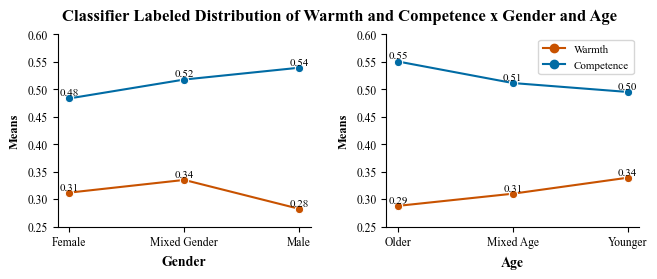

  0%|          | 0/4 [00:00<?, ?it/s]

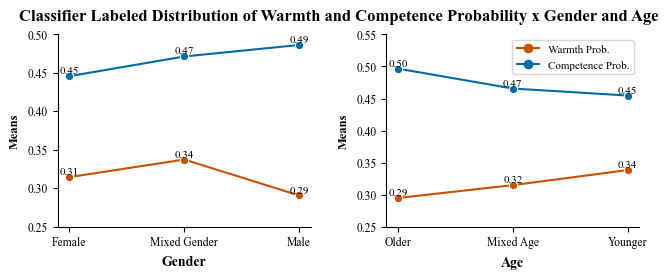

In [50]:
# Make df_jobs warmth and competence separate violin plots
close_plots()
colors_dict = {
    'Warmth': 'C5',
    'Competence': 'C0',
    'Warmth_Probability': 'C5',
    'Competence_Probability': 'C0',
}

print(f'{"+"*20} DF_JOBS {"+"*20}\n')

title_prefix = 'Classifier Labeled'

# Warmth and Competence
fig, axs = plt.subplots(1, 2, figsize=(7.5, 2.5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence x Gender and Age')

cat_line_plot = make_df_jobs_2ax_lineplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[:2], colors_dict=colors_dict)
fig = cat_line_plot.get_figure()

for image_save_format in ['eps', 'png', 'svg']:
    fig.savefig(
        f'{plot_save_path}{df_name} - {title_prefix} Line Plot (2 ax) - Warmth Categorical.{image_save_format}',
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots()

close_plots()

# Warmth and Competence Probability
fig, axs = plt.subplots(1, 2, figsize=(7.5, 2.5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence Probability x Gender and Age')

prob_line_plot = make_df_jobs_2ax_lineplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[2:], colors_dict=colors_dict)
fig = prob_line_plot.get_figure()

for image_save_format in ['eps', 'png', 'svg']:
    fig.savefig(
        f'{plot_save_path}{df_name} - {title_prefix} Line Plot (2 ax) - Warmth Probability.{image_save_format}',
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots()


In [51]:
def make_4ax_lineplot(df, ivs_cat_and_perc, dvs_all, axs, colors_dict, params_=None, line_plots=None):

    if params_ is None:
        params_ = {
            'marker': 'o',
            'linestyle': '-',
        }

    if line_plots is None:
        line_plots = []

    if df_name == 'df_manual':
        for r, c in tqdm_product(range(2, 4), range(2)):
            fig.delaxes(axs[r, c])

    for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[:2]):
        data = df.groupby(iv)[dv].agg('mean').astype(float)
        params = params_ | {
            'data': data,
            'color': colors_dict[dv],
            'seed': random_state,
            'estimator': 'mean',
            'ax': axs[
                0 if iv == ivs_cat_and_perc[0] else 1,
                0 if dv == dvs_all[0] else 1,
            ],
        }
        line_plot = sns.lineplot(**params)

        # Set labels and legend
        for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
            offset = (0, var_value + var_value/30)
            line_plot.annotate(
                f'{var_value:.2f}',
                xy=(var_name, var_value),
                fontsize=9, ha='center', va='bottom',
                xytext=offset, textcoords='offset points'
            )
        line_plot.set_ylabel('Means', fontsize=9)

        if dv == dvs_all[1] and iv == ivs_cat_and_perc[0]:
            handles = [
                mpl.lines.Line2D([], [], color=color, linestyle='-', marker='o')
                for color in [colors_dict[dv] for dv in dvs_all]
            ]
            labels = dvs_all[:2]
            line_plot.legend(handles=handles, labels=labels, fontsize=8, bbox_to_anchor=(0.59, 0.8))

        line_plots.append(line_plot)

    if df_name == 'df_jobs':
        for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[2:]):
            data = df.groupby(iv)[dv].agg('mean').astype(float)
            params = params_ | {
                'data': data,
                'color': colors_dict[dv],
                'seed': random_state,
                'estimator': 'mean',
                'ax': axs[
                    2 if iv == ivs_cat_and_perc[0] else 3,
                    0 if dv == dvs_all[2] else 1,
                ],
            }
            line_plot = sns.lineplot(**params)

            # Set labels and legend
            for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
                offset = (0, var_value + var_value/30)
                line_plot.annotate(
                    f'{var_value:.2f}',
                    xy=(var_name, var_value),
                    fontsize=9, ha='center', va='bottom',
                    xytext=offset, textcoords='offset points'
                )
            line_plot.set_ylabel('Means', fontsize=9)

            if dv == dvs_all[3] and iv == ivs_cat_and_perc[0]:
                handles = [
                    mpl.lines.Line2D([], [], color=color, linestyle='-', marker='o')
                    for color in [colors_dict[dv] for dv in dvs_all]
                ]
                labels = [
                    f'{dv.split("_")[0]} Prob.'
                    if '_' in dv
                    else dv
                    for dv in dvs_all[2:]
                ]
                line_plot.legend(handles=handles, labels=labels, fontsize=8, bbox_to_anchor=(0.35, 0.5))

            line_plots.append(line_plot)

    return line_plots


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

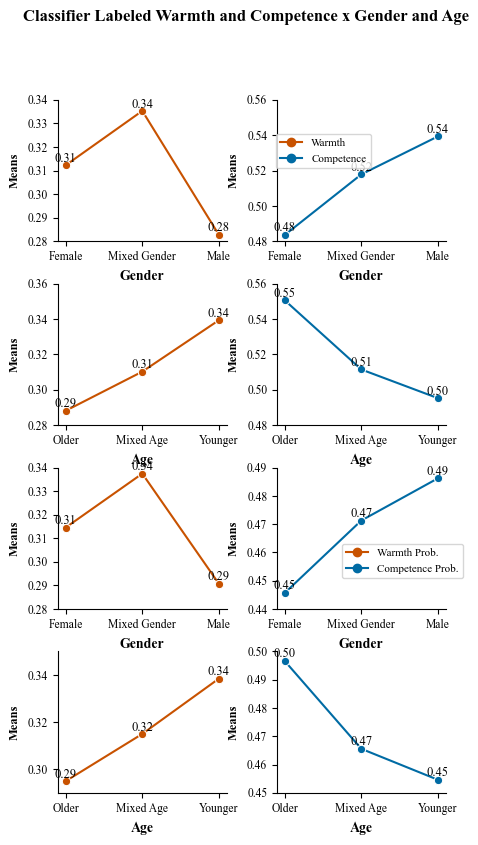

++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

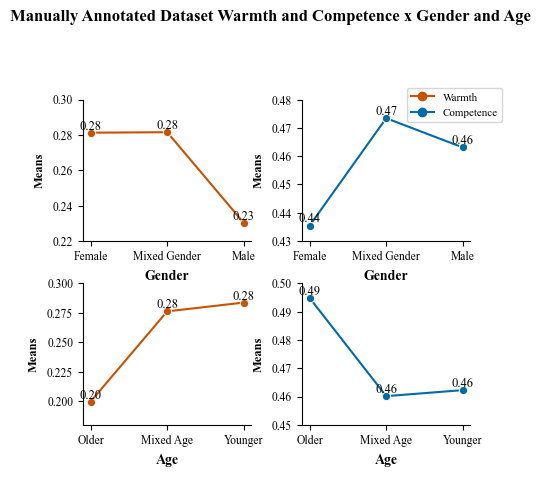

In [52]:
# Make line plots 4 ax
for df_name, df in dataframes.items():
    close_plots()
    colors_dict = {
        'Warmth': 'C5',
        'Competence': 'C0',
        'Warmth_Probability': 'C5',
        'Competence_Probability': 'C0',
    }

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    fig, axs = plt.subplots(4, 2, figsize=(5, 9))
    fig.suptitle(f'{title_prefix} Warmth and Competence x Gender and Age')

    line_plots = make_4ax_lineplot(df, ivs_cat_and_perc, dvs_all, axs, colors_dict)

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Line Plot (4 ax).{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [53]:
# %%time
# @interact(df_name=dataframes.keys())
# def plot_lineplots_4ax_interact(df_name):
#     plot_lineplots_4ax(df_name, dataframes[df_name])


In [54]:
def make_df_jobs_4ax_lineplot(df, ivs_, dvs_, colors_dict, params_=None):
    if params_ is None:
        params_ = {
            'marker': 'o',
            'linestyle': '-',
        }

    for iv, dv in tqdm_product(ivs_, dvs_):
        data = df.groupby(iv)[dv].agg('mean').astype(float)
        params = params_ | {
            'data': data,
            'color': colors_dict[dv],
            'seed': random_state,
            'estimator': 'mean',
            'ax': axs[
                0 if iv == ivs_[0] else 1,
                0 if dv == dvs_[0] else 1,
            ],
        }
        line_plot = sns.lineplot(**params)

        # Set labels and legend
        for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
            offset = (0, var_value + var_value/30)
            line_plot.annotate(
                f'{var_value:.2f}',
                xy=(var_name, var_value),
                fontsize=9, ha='center', va='bottom',
                xytext=offset, textcoords='offset points'
            )
        line_plot.set_ylabel('Means', fontsize=9)

        if dv == dvs_[1] and iv == ivs_[0]:
            handles = [
                mpl.lines.Line2D([], [], color=color, linestyle='-', marker='o')
                for color in [colors_dict[dv] for dv in dvs_]
            ]
            labels = [
                f'{dv.split("_")[0]} Prob.'
                if '_' in dv
                else dv
                for dv in dvs_
            ]
            line_plot.legend(handles=handles, labels=labels, fontsize=8, loc='best')

    return line_plot


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



  0%|          | 0/4 [00:00<?, ?it/s]

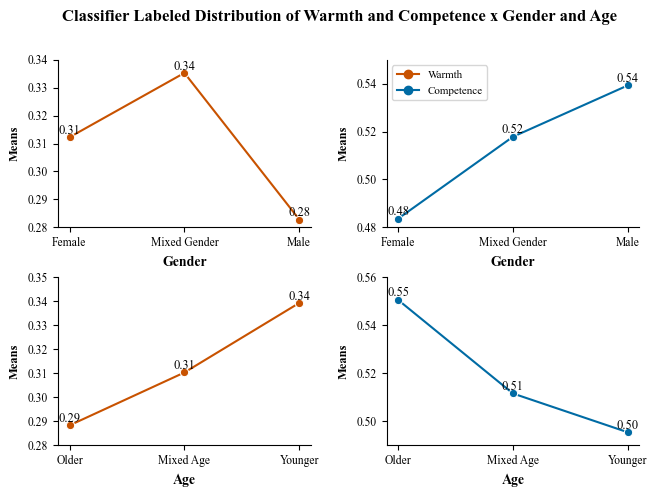

  0%|          | 0/4 [00:00<?, ?it/s]

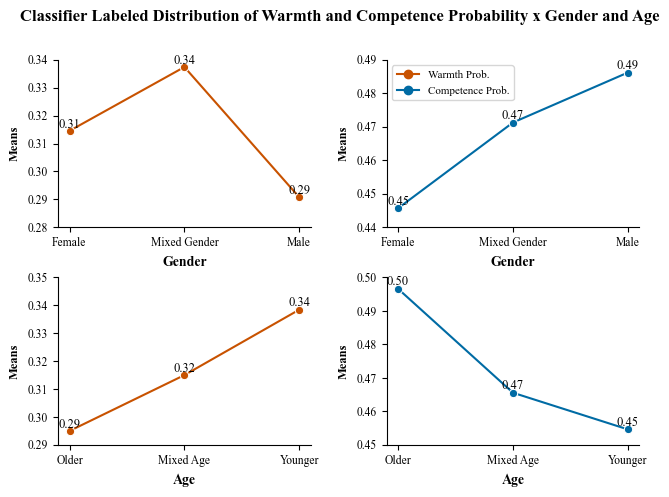

In [55]:
# Make df_jobs warmth and competence separate violin plots
close_plots()
colors_dict = {
    'Warmth': 'C5',
    'Competence': 'C0',
    'Warmth_Probability': 'C5',
    'Competence_Probability': 'C0',
}

print(f'{"+"*20} DF_JOBS {"+"*20}\n')

title_prefix = 'Classifier Labeled'

# Warmth and Competence
fig, axs = plt.subplots(2, 2, figsize=(7.5, 5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence x Gender and Age')

cat_line_plot = make_df_jobs_4ax_lineplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[:2], colors_dict=colors_dict)
fig = cat_line_plot.get_figure()

for image_save_format in ['eps', 'png', 'svg']:
    fig.savefig(
        f'{plot_save_path}{df_name} - {title_prefix} Line Plot (4 ax) - Warmth Categorical.{image_save_format}',
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots()

close_plots()

# Warmth and Competence Probability
fig, axs = plt.subplots(2, 2, figsize=(7.5, 5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence Probability x Gender and Age')

prob_line_plot = make_df_jobs_4ax_lineplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[2:], colors_dict=colors_dict)
fig = prob_line_plot.get_figure()

for image_save_format in ['eps', 'png', 'svg']:
    fig.savefig(
        f'{plot_save_path}{df_name} - {title_prefix} Line Plot (4 ax) - Warmth Probability.{image_save_format}',
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots()


In [56]:
def make_violinplot(df, df_name, ivs_cat_and_perc, dvs_all, axs, pallette=None, params_=None, configs=None):
    if pallette is None:
        pallette = ['C5', 'C2', 'C0']
    if params_ is None:
        params_ = {
            'data': df,
            'palette': pallette,
            'inner': 'quartile'
        }
    if configs is None:
        configs = {
            'test': 't-test_welch',
            'comparisons_correction': 'Bonferroni',
            'test_short_name': True,
            'pvalue_thresholds': [(0.001, '***'), (0.01, '**'), (0.05, '*')],
            'correction_format': 'replace',
            'loc': 'inside',
            'show_test_name': True,
            'text_format': 'simple',
            'verbose': 2,
            'fontsize': 'small',
            'line_height': 0.06,
            'text_offset': 5,
        }

    if df_name == 'df_manual':
        for r, c in tqdm_product(range(2, 4), range(2)):
            fig.delaxes(axs[r, c])

    for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[:2]):
        pairs = [
            cat
            for cat in itertools.product(ivs_dict[iv], ivs_dict[iv])
            if cat[0] != cat[1]
        ]
        params = params_ | {
            'x': iv,
            'y': dv,
            'ax': axs[
                0 if iv == ivs_cat_and_perc[0] else 1,
                0 if dv == dvs_all[0] else 1,
            ],
            'pairs': list({*map(tuple, map(sorted, pairs))})

        }
        violin_plot = sns.violinplot(**params)
        violin_plot.set_ylabel(' '.join(dv.split('_')) if '_' in dv else dv)
        annotator = Annotator(**params)
        annotator.configure(**configs)
        annotator.apply_and_annotate()

    if df_name == 'df_jobs':
        for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[2:]):
            pairs = [
                cat
                for cat in itertools.product(ivs_dict[iv], ivs_dict[iv])
                if cat[0] != cat[1]
            ]
            params = params_ | {
                'x': iv,
                'y': dv,
                'ax': axs[
                    2 if iv == ivs_cat_and_perc[0] else 3,
                    0 if dv == dvs_all[2] else 1,
                ],
                'pairs': list({*map(tuple, map(sorted, pairs))})
            }
            violin_plot = sns.violinplot(**params)
            violin_plot.set_ylabel(' '.join(dv.split('_')) if '_' in dv else dv)
            annotator = Annotator(**params)
            annotator.configure(**configs)
            annotator.apply_and_annotate()

    return violin_plot


In [57]:
# Make violin plots
def plot_violinplots(df_name, df):
    close_plots()

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    fig, axs = plt.subplots(4, 2, figsize=(6, 12.5))
    fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence x Gender and Age')

    violin_plot = make_violinplot(df, df_name, ivs_cat_and_perc, dvs_all, axs)

    fig = violin_plot.get_figure()

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Violin Plot.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [58]:
%%time
@interact(df_name=dataframes.keys())
def plot_violinplots_interact(df_name):
    plot_violinplots(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 1min 6s, sys: 9 s, total: 1min 15s
Wall time: 50.4 s


In [59]:
def make_df_jobs_violinplot(df, ivs_, dvs_, pallette=None, params_=None, configs=None):
    if pallette is None:
        pallette = ['C5', 'C2', 'C0']
    if params_ is None:
        params_ = {
            'data': df,
            'palette': pallette,
            'inner': 'quartile'
        }
    if configs is None:
        configs = {
            'test': 't-test_welch',
            'comparisons_correction': 'Bonferroni',
            'test_short_name': True,
            'pvalue_thresholds': [(0.001, '***'), (0.01, '**'), (0.05, '*')],
            'correction_format': 'replace',
            'loc': 'inside',
            'show_test_name': True,
            'text_format': 'simple',
            'verbose': 2,
            'fontsize': 'small',
            'line_height': 0.06,
            'text_offset': 5,
        }

    for iv, dv in tqdm_product(ivs_, dvs_):
        pairs = [
            cat
            for cat in itertools.product(ivs_dict[iv], ivs_dict[iv])
            if cat[0] != cat[1]
        ]
        params = params_ | {
            'x': iv,
            'y': dv,
            'ax': axs[
                0 if iv == ivs_[0] else 1,
                0 if dv == dvs_[0] else 1,
            ],
            'pairs': list({*map(tuple, map(sorted, pairs))})

        }
        violin_plot = sns.violinplot(**params)
        violin_plot.set_ylabel(' '.join(dv.split('_')) if '_' in dv else dv)
        annotator = Annotator(**params)
        annotator.configure(**configs)
        annotator.apply_and_annotate()

    return violin_plot


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



  0%|          | 0/4 [00:00<?, ?it/s]

Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:6.660e-163 t=2.726e+01
Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:4.068e-26 t=-1.068e+01
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:5.838e-43 t=1.382e+01
Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:2.178e-24 t=-1.030e+01
Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:3.006e-49 t=-1.483e+01
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:1.999e-126 t=-2.398e+01
Older vs. Mixed Age: Welch's t-test independent samples with Bonferroni correction, P_val:9.361e-26 t=-1.060e+01
Mixed Age vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:9.418e-33 t=-1.202e+01
Older vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:3.

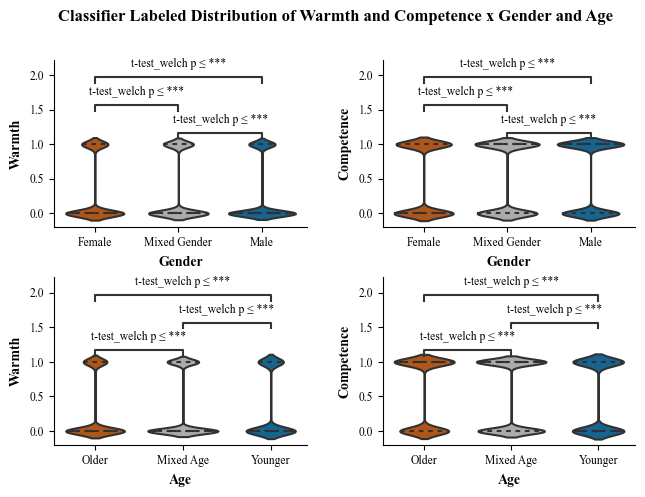

  0%|          | 0/4 [00:00<?, ?it/s]

Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:2.155e-195 t=2.989e+01
Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:1.753e-38 t=-1.306e+01
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:2.425e-42 t=1.372e+01
Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:4.031e-24 t=-1.024e+01
Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:9.664e-56 t=-1.580e+01
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:3.288e-136 t=-2.491e+01
Older vs. Mixed Age: Welch's t-test independent samples with Bonferroni correction, P_val:1.404e-31 t=-1.179e+01
Mixed Age vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:1.130e-32 t=-1.200e+01
Older vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:2.

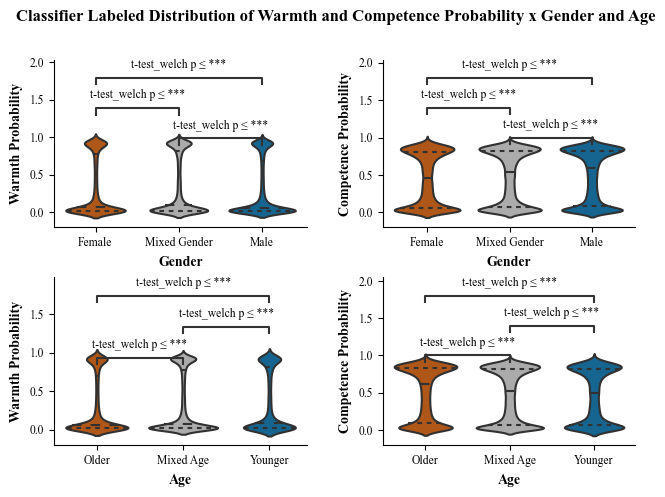

In [60]:
# Make df_jobs warmth and competence separate violin plots
close_plots()
print(f'{"+"*20} DF_JOBS {"+"*20}\n')

title_prefix = 'Classifier Labeled'

# Warmth and Competence
fig, axs = plt.subplots(2, 2, figsize=(7.5, 5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence x Gender and Age')

cat_violin_plot = make_df_jobs_violinplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[:2])
fig = cat_violin_plot.get_figure()

for image_save_format in ['eps', 'png', 'svg']:
    fig.savefig(
        f'{plot_save_path}{df_name} - {title_prefix} Violin Plot - Warmth Categorical.{image_save_format}',
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots()

close_plots()

# Warmth and Competence Probability
fig, axs = plt.subplots(2, 2, figsize=(7.5, 5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence Probability x Gender and Age')

prob_violin_plot = make_df_jobs_violinplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[2:])
fig = prob_violin_plot.get_figure()

for image_save_format in ['eps', 'png', 'svg']:
    fig.savefig(
        f'{plot_save_path}{df_name} - {title_prefix} Violin Plot - Warmth Probability.{image_save_format}',
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots()


In [61]:
def make_violin_plot_reversed(df, df_name, title_prefix, ivs_cat_and_perc, dvs_all, pallette=None, params_=None, configs=None):
    if pallette is None:
        pallette = ['C2', 'C5']
    if params_ is None:
        params_ = {
            'data': df,
            'palette': pallette,
            'inner': 'quartile'
        }
    if configs is None:
        configs = {
            'test': 't-test_welch',
            'comparisons_correction': 'Bonferroni',
            'test_short_name': True,
            'pvalue_thresholds': [(0.001, '***'), (0.01, '**'), (0.05, '*')],
            'correction_format': 'replace',
            'loc': 'inside',
            'show_test_name': True,
            'text_format': 'simple',
            'verbose': 2,
            'fontsize': 'small',
            'line_height': 0.06,
            'text_offset': 5,
        }

    fig, axs = plt.subplots(len(ivs_cat_and_perc[2:]), len(dvs_all[:2]), figsize=(8, 11))
    fig.suptitle(f'{title_prefix} Distribution of Gender and Age Percentages x Warmth and Competence')

    for i, iv in enumerate(ivs_cat_and_perc[2:]):
        for j, dv in enumerate(dvs_all[:2]):
            params = params_ | {
                'x': dv,
                'y': iv,
                'ax': axs[i, j],
                'pairs': [(0, 1)]
            }

            violin_plot = sns.violinplot(**params)
            violin_plot.set_ylabel(' '.join(iv.split('_')[-2:]) if '_' in iv else iv)
            annotator = Annotator(**params)
            annotator.configure(**configs)
            annotator.apply_and_annotate()

    return violin_plot


In [62]:
# Make violin plots
def plot_violinplots_reversed(df_name, df):
    close_plots()

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    violin_plot = make_violin_plot_reversed(df, df_name, title_prefix, ivs_cat_and_perc, dvs_all)

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Violin Plot Reversed.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [63]:
%%time
@interact(df_name=dataframes.keys())
def plot_violinplots_reversed_interact(df_name):
    plot_violinplots_reversed(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 43.9 s, sys: 4.67 s, total: 48.6 s
Wall time: 25.1 s


## Controls

In [64]:
def plot_correlation_controls(df_name, df):
    close_plots()

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    considered_features = controls[:2] + ivs_dummy_and_perc[:]
    cont_controls = df[considered_features]
    mask = np.triu(np.ones_like(cont_controls.corr(), dtype=bool))
    correlation_matrix = sns.heatmap(cont_controls.corr().round(2), mask=mask, vmin=-1, vmax=1, annot=True, annot_kws={"fontsize":7}, cmap=plt.cm.Blues)

    # Fix xticklabels and yticklabels
    correlation_matrix.set_xticklabels(
        labels=[
            ' '.join(xticklabel.get_text().split('_'))
            if '_' in xticklabel.get_text()
            else xticklabel.get_text()
            for xticklabel in correlation_matrix.get_xticklabels()
        ],
        rotation=45,
        horizontalalignment='right',
    )
    correlation_matrix.set_yticklabels(
        labels=[
            ' '.join(yticklabel.get_text().split('_'))
            if '_' in yticklabel.get_text()
            else yticklabel.get_text()
            for yticklabel in correlation_matrix.get_yticklabels()
        ],
    )
    plt.title("Predictors Correlation: Pearson's R Coefficients Heatmap")

    fig = plt.gcf()
    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f"{plot_save_path}{df_name} - Predictors Correlation Pearson's R Coefficients Heatmap.{image_save_format}",
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()

In [65]:
%%time
@interact(df_name=dataframes.keys())
def plot_correlation_controls_interact(df_name):
    plot_correlation_controls(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 23.4 s, sys: 1.24 s, total: 24.6 s
Wall time: 22.1 s


## Platform

++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++



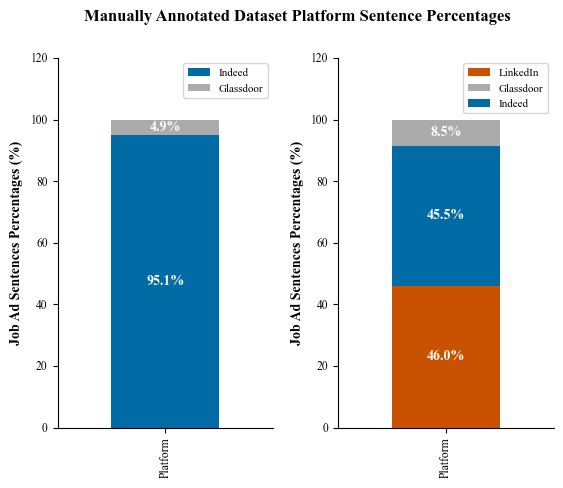

In [66]:
# Ploting Categorical Gender and Age
close_plots()
color_dict = {
    'LinkedIn': 'C5', 'Glassdoor': 'C2', 'Indeed': 'C0',
}
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Collected Dataset'

fig, axs = plt.subplots(1, 2)
fig.suptitle(f'{title_prefix} Platform Sentence Percentages')

# df_manual
df_manual_platform_transposed = df_manual['Platform'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().transpose().set_index(pd.Index(['Platform']))
df_manual_platform_colors = [color_dict[col] for col in df_manual_platform_transposed.columns]
df_manual_platform_transposed.plot(
    kind='bar', legend=True, stacked=True, ax=axs[0], color=df_manual_platform_colors
)

# df_jobs
df_jobs_platform_transposed = df_jobs['Platform'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().transpose().set_index(pd.Index(['Platform']))
df_jobs_platform_colors = [color_dict[col] for col in df_jobs_platform_transposed.columns]
df_jobs_platform_transposed.plot(
    kind='bar', legend=True, stacked=True, ax=axs[1], color=df_jobs_platform_colors
)
for ax in axs:
    ax.set_ylabel('Job Ad Sentences Percentages (%)')
    for container in ax.containers:
        labels = [f'{height:.1f}%' for v in container if float(height:= v.get_height())]
        ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold')

# Set Legend
## df_manual
handles, labels = axs[0].get_legend_handles_labels()
axs[0] = axs[0].legend(handles=[handles[idx] for idx in [0, 1]], labels=[labels[idx] for idx in [0, 1]], loc='upper right', fontsize=8)
## df_jobs
handles, labels = axs[1].get_legend_handles_labels()
axs[1] = axs[1].legend(handles=[handles[idx] for idx in [0, 2, 1]], labels=[labels[idx] for idx in [0, 2, 1]], loc='upper right', fontsize=8)

for image_save_format in ['eps', 'png', 'svg']:
    fig.savefig(
        f'{plot_save_path}{df_name} - Platform Categorical Gender and Age Sentences.{image_save_format}',
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots()


In [67]:
# Make stacked barplots with percentages
def make_stacked_barplot(df, df_name, dvs):
    close_plots()

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    iv = 'Platform'
    fig, ax = plt.subplots()
    fig.suptitle(f'{title_prefix} Warmth and Competence Sentence Percentages per {iv}')

    try:
        vars_list = [iv, *dvs]
        df_pivot = df[
            vars_list
        ].pivot_table(
            index=iv, values=dvs, fill_value=0, aggfunc=lambda x: (100*x.sum())/len(df)
        )
    except KeyError:
        from setup_module.imports import dvs
        vars_list = [iv, *dvs]
        df_pivot = df[
            vars_list
        ].pivot_table(
            index=iv, values=dvs, fill_value=0, aggfunc=lambda x: (100*x.sum())/len(df)
        )

    df_pivot.sort_values(by=iv, ascending=False).plot(kind='barh', legend=True, stacked=True, ax=ax, color=['C0', 'C5'])

    ax.legend(dvs)

    for container in ax.containers:
        labels = [f'{width:.1f}%' for v in container if float(width:= v.get_width())]
        if iv != 'Sector':
            ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=8.2, weight='bold')
        ax.set_xlabel('Job Ad Sentences Percentages (%)')
        ax.set_ylabel(iv)
        ax.legend(loc='upper right', fontsize=10)

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Platform Barplot - {iv} x {dvs[0]} and {dvs[1]} Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [68]:
%%time
@interact(df_name=dataframes.keys())
def plot_stacked_barplot_interact(df_name):
    make_stacked_barplot(dataframes[df_name], df_name, dvs)


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 16 s, sys: 534 ms, total: 16.6 s
Wall time: 15.4 s


In [69]:
# Make line plots 2 ax
def plot_lineplots_2ax(df_name, df):
    close_plots()
    colors_dict = {
        'Warmth': 'C5',
        'Competence': 'C0',
        'Warmth_Probability': 'C5',
        'Competence_Probability': 'C0',
    }

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled Probabilities of'

    iv = 'Platform'
    fig, ax = plt.subplots()
    fig.suptitle(f'{title_prefix} Warmth and Competence x {iv}')

    params_ = {
        'marker': 'o',
        'linestyle': '-',
    }

    if df_name == 'df_manual':
        for dv in dvs_all[:2]:
            data = df.groupby(iv)[dv].agg('mean').astype(float)
            params = params_ | {
                'data': data,
                'color': colors_dict[dv],
                'ax': ax,
            }
            line_plot = sns.lineplot(**params)
            # Set labels and legend
            for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
                offset = (0, var_value + var_value/30)
                line_plot.annotate(
                    f'{var_value:.2f}',
                    xy=(var_name, var_value),
                    fontsize=9, ha='center', va='bottom',
                    xytext=offset, textcoords='offset points'
                )
            line_plot.set_ylabel('Scores')
    elif df_name == 'df_jobs':
        for dv in dvs_all[2:]:
            data = df.groupby(iv)[dv].agg('mean').astype(float)
            params = params_ | {
                'data': data,
                'color': colors_dict[dv],
                'ax': ax,
            }
            line_plot = sns.lineplot(**params)

            # Set labels and legend
            for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
                offset = (0, var_value + var_value/30)
                line_plot.annotate(
                    f'{var_value:.2f}',
                    xy=(var_name, var_value),
                    fontsize=9, ha='center', va='bottom',
                    xytext=offset, textcoords='offset points'
                )
            line_plot.set_ylabel('Scores')

    # Set Legend
    handles = [mpl.lines.Line2D([], [], color=color, linestyle='-', marker='o') for color in [colors_dict[dv] for dv in  dvs_all[:2]]]
    fig.legend(handles=handles, labels=dvs, fontsize=10, bbox_to_anchor=(1, 0.95))

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Platform Line Plot (2 ax).{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )


In [70]:
%%time
@interact(df_name=dataframes.keys())
def plot_lineplots_2ax_interact(df_name):
    plot_lineplots_2ax(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 16.9 s, sys: 537 ms, total: 17.4 s
Wall time: 16.2 s


In [71]:
# Make violin plots
def plot_violinplots_2ax(df_name, df):
    close_plots()

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    iv = 'Platform'
    fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))
    fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence x {iv}')

    pallette = ['C5', 'C2', 'C0']
    params_ = {
        'data': df,
        'palette': pallette,
        'inner': 'quartile'
    }
    configs = {
        'test': 't-test_welch',
        'comparisons_correction': 'Bonferroni',
        'test_short_name': True,
        'pvalue_thresholds': [(0.001, '***'), (0.01, '**'), (0.05, '*')],
        'correction_format': 'replace',
        'loc': 'inside',
        'show_test_name': True,
        'text_format': 'simple',
        'verbose': 2,
        'fontsize': 'small',
        'line_height': 0.06,
        'text_offset': 5,
    }

    if df_name == 'df_manual':
        for dv in dvs_all[:2]:
            pairs = [
                platform
                for platform in itertools.product(df[iv].unique(), df[iv].unique())
                if platform[0] != platform[1]
            ]
            params = params_ | {
                'x': iv,
                'y': dv,
                'ax': axs[
                    0 if dv == dvs_all[0] else 1,
                ],
                'pairs': list({*map(tuple, map(sorted, pairs))})

            }
            violin_plot = sns.violinplot(**params)
            violin_plot.set_ylabel(' '.join(dv.split('_')) if '_' in dv else dv)
            annotator = Annotator(**params)
            annotator.configure(**configs)
            annotator.apply_and_annotate()
    elif df_name == 'df_jobs':
        for dv in dvs_all[2:]:
            pairs = [
                platform
                for platform in itertools.product(df[iv].unique(), df[iv].unique())
                if platform[0] != platform[1]
            ]
            params = params_ | {
                'x': iv,
                'y': dv,
                'ax': axs[
                    0 if dv == dvs_all[2] else 1,
                ],
                'pairs': list({*map(tuple, map(sorted, pairs))})
            }
            violin_plot = sns.violinplot(**params)
            violin_plot.set_ylabel(' '.join(dv.split('_')) if '_' in dv else dv)
            annotator = Annotator(**params)
            annotator.configure(**configs)
            annotator.apply_and_annotate()

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Platform Violin Plot.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [72]:
%%time
@interact(df_name=dataframes.keys())
def plot_violinplots_2ax_interact(df_name):
    plot_violinplots_2ax(df_name, dataframes[df_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Outp…

CPU times: user 17.3 s, sys: 2.32 s, total: 19.6 s
Wall time: 11.3 s


#### Robustness check with R ggstatsplot

In [73]:
# %load_ext rpy2.ipython
# %R require(ggstatsplot)
# %R require(glue)

# from rpy2.ipython.ggplot import image_png
# import rpy2.robjects.lib.ggplot2 as ggplot2

# # Enable html printing
# rpy2.ipython.html.init_printing()

# # Set utils and base
# utils = importr('utils')
# base = importr('base')

# # Set CRAN mirror
# utils.chooseCRANmirror(ind=56)

# # Install packages
# packages = [
#     'ggplot2', 'ggstatsplot', 'glue', 'tidyverse', 'janitor', 'lme4', 'lmeInfo', 'broom', 'performance'
# ]
# utils.install_packages(StrVector(packages))

# # Import packages
# ggstatsplot = importr('ggstatsplot')
# ggplot2 = importr('ggplot2')
# glue = importr('glue')
# tidyverse = importr('tidyverse')
# janitor = importr('janitor')
# lme4 = importr('lme4')
# lmeInfo = importr('lmeInfo')
# broom = importr('broom')
# performance = importr('performance')


In [74]:
# %%R -i df_manual,df_jobs,dvs,dvs_prob,dvs_all,ivs,ivs_dummy,ivs_perc,ivs_dummy_and_perc,ivs_all,colorblind_hex_colors -w 5 -h 5 --units in -r 200

# # Set CRAN mirror to Netherlands
# chooseCRANmirror(ind=56)

# # Install packages
# install.packages('ggplot2')
# install.packages('ggstatsplot')
# install.packages('glue')

# # Load libraries
# if (!require(ggstatsplot)) {
#   install.packages("ggstatsplot", repos = "https://cloud.r-project.org")
# }
# library(ggstatsplot)

# data = df_manual

# # Set colors
# cbPalette <- colorblind_hex_colors
# scale_fill_manual(values=cbPalette)
# scale_colour_manual(values=cbPalette)

# ## Function to perform analysis
# analysis_func <- function(df, iv, dv){
#   strrep("=",80)
#   print(glue('Analyzing {df_name}'))
#   strrep("-",20)
#   print(glue('{iv} x {dv}'))
#   strrep("-",20)
#   ## Levene's Test
#   lev = leveneTest(data = df, data[[dv]] ~ data[[iv]])

#   if (lev["group", 3] <= 0.05){
#       lev_not_sig = FALSE
#       print(glue("Levene's test is NOT significant at {lev['group', 3]}"))
#       } else if (lev["group", 3] >= 0.05){
#       lev_not_sig = TRUE
#       print(glue("Levene's test is significant at {lev['group', 3]}"))
#   }

#   ## One-way Welch's ANOVA
#   strrep("-",20)
#   print(glue("One-way Welch's ANOVA for {iv} x {dv}"))
#   strrep("-",20)
#   one_way <-
#       aov(data[[dv]] ~ as.factor(data[[iv]]),
#           data = df,
#           var.equal = lev_not_sig)
#   anova(one_way)
#   res <- gamesHowellTest(one_way)
#   summaryGroup(res)
#   summary(res)

#   ## OLS Regression
#   strrep("-",20)
#   print(glue('Regression for {iv} x {dv}'))
#   strrep("-",20)
#   lm <- lm(data[[dv]] ~ as.factor(data[[iv]]), data = df)
#   summ(lm)
#   summary(lm)$coef
#   par(mfrow = c(2, 2))
#   plot(lm)
#   return(lev_not_sig)
#   strrep("=",80)

# }

# for (iv in ivs_dummy){
#   for (dv in dvs_prob){
#     lev_not_sig <- analysis_func(df = data,
#                                  iv = iv,
#                                  dv = dv)
#     vplot <- ggbetweenstats(
#       data = data,
#       x = data[[iv]],
#       y = data[[dv]],
#       type = "parametric",
#       conf.level = 0.95,
#       plot.type = "boxviolin",
#       mean.plotting = TRUE,
#       outlier.tagging = TRUE,
#       outlier.coef = 1.5,
#       outlier.label = region,
#       outlier.label.color = "red",
#       sphericity.correction = TRUE,
#       p.adjust.method = "bonferroni",
#       pairwise.comparisons = TRUE,
#       pairwise.display = "significant",
#       centrality.plotting = TRUE,
#       centrality.path = TRUE,
#       centrality.type = "parameteric",
#       bf.message = TRUE,
#     )

#     vplot <- ggbetweenstats(
#       data = data,
#       x = data[[iv]],
#       y = data[[dv]],
#       xlab = glue("{iv} segregated sectors"),
#       ylab = glue("Presence of {dv}-related frames"),
#       type = "parametric",
#       conf.level = 0.95,
#       # ANOVA or Kruskal-Wallis
#       var.equal = lev_not_sig,
#       # ANOVA or Welch ANOVA
#       plot.type = "boxviolin",
#       mean.plotting = TRUE,
#       outlier.tagging = TRUE,
#       outlier.coef = 1.5,
#       outlier.label = region,
#       outlier.label.color = "red",
#       sphericity.correction = TRUE,
#       p.adjust.method = "bonferroni",
#       pairwise.comparisons = TRUE,
#       pairwise.display = "significant",
#       centrality.plotting = TRUE,
#       centrality.path = TRUE,
#       centrality.type = "parameteric",
#       bf.message = TRUE,
#       title = glue("Violin plot of {dv}-related frames in job ads from {iv} segregated sectors"),
#       caption = glue("{dv}-{iv} Violin plot ")
#     )
#     print(vplot)

#     # #### Save violin plot
#     # ggplot2::ggsave(
#     #     filename = glue("{plot_save_path}Violinplot {df_name} - {iv} x {dv}.png"),
#     #     plot = vplot,
#     #     device = "png",
#     #     dpi = 1200,
#     #     width = 15,
#     #     height = 10,
#     #     units = "cm"
#     # )
#   }
# }


# Tables

In [75]:
def save_desc_excel(
    df_desc,
    index_var,
    file_save_path,
    sheet_name=None,
    startrow=None,
    startcol=None,
):
    if sheet_name is None:
        sheet_name = 'All'
    if startrow is None:
        startrow = 1
    if startcol is None:
        startcol = 1

    # index = df_desc.index.to_frame().reset_index(drop=True)
    df_desc = df_desc.reset_index(drop=False, col_level=1, col_fill=f'{title_prefix} Job Advertisements') 

    # Define last rows and cols locs
    header_range = len(df_desc.columns.levels)
    endrow = startrow + header_range + df_desc.shape[0]
    endcol = startcol + df_desc.shape[1]

    # Write
    writer = pd.ExcelWriter(f'{file_save_path}.xlsx')
    df_desc.to_excel(writer, sheet_name=sheet_name, merge_cells=True, startrow=startrow, startcol=startcol)
    workbook  = writer.book
    worksheet = writer.sheets[sheet_name]
    worksheet.set_row(startrow + header_range, None, None, {'hidden': True}) # hide the empty row that appears after the headers
    worksheet.set_column(startrow, 1, None, None, {'hidden': True}) # hide the index column

    # MAIN BODY
    # Format column headers
    for i, (col_num, col_value) in tqdm_product(range(header_range), (enumerate(df_desc.columns.values))):
        row_to_write = startrow + i
        col_to_write = startcol + 1 + col_num # 1 is for index
        header_formats = {'bold': False, 'font_name': 'Times New Roman', 'font_size': 12, 'font_color': 'black', 'align': 'center', 'top': True, 'bottom': True, 'left': False, 'right': False}

        if col_value[i] in ['n', 'M', 'SD']:
            header_formats |= {'italic': True}

        if col_value[i] == '95% Conf.':
            worksheet.set_column(col_to_write, col_to_write, 8.5)

        if col_value[i] == index_var:
            worksheet.set_column(col_to_write, col_to_write, 10)
            header_formats['align'] = 'left'
            header_formats |= {'text_wrap': True}
            worksheet.merge_range(row_to_write, col_to_write, header_range, col_to_write, index_var, workbook.add_format(header_formats))
        else:
            worksheet.write(row_to_write, col_to_write, col_value[i], workbook.add_format(header_formats))

    # Format body columns
    num = [col_num for col_num, value in enumerate(df_desc.columns.values) if value[-1] == 'n']
    perc = [col_num for col_num, value in enumerate(df_desc.columns.values) if value[-1] == '%']
    body_max_row_idx, body_max_col_idx = df_desc.shape

    for c, r in tqdm_product(range(body_max_col_idx), range(body_max_row_idx)):
        row_to_write = startrow + header_range + 1 + r # 1 is for the hidden empty column under the header
        col_to_write = startcol + 1 + c # 1 is for index
        body_formats = {'num_format': '0.00', 'font_name': 'Times New Roman', 'font_size': 12, 'font_color': 'black', 'align': 'center', 'text_wrap': True, 'left': False, 'right': False}

        if r == body_max_row_idx-1:
            body_formats |= {'bottom': True}

        if c == 0:
            body_formats |= {'align': 'left'}

        if c in num:
            body_formats |= {'num_format': '0'}

        if c in perc:
            body_formats |= {'num_format': '0.0'}

        worksheet.write(row_to_write, col_to_write, df_desc.iloc[r, c], workbook.add_format(body_formats))

    writer.close()


In [76]:
def make_df_desc(df, df_name, vars_list, var_name, index_var, sentence_level=False, continous_var_names_list=None):

    if continous_var_names_list is None:
        continous_var_names_list = ['Probabilities', 'Percentages']

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    if sentence_level == False:
        level = 'Job Advertisement'
        df = df.groupby('Job ID').first()
    if sentence_level == True:
        level = 'Sentence'

    # Warmth and Competence Categorical df
    if len(set(var_name.split()).intersection(continous_var_names_list)) == 0:
        df_cat = rp.summary_cat(df[vars_list], ascending= True).round(2)
        df_cat['Variable'] = df_cat['Variable'].replace('', np.nan).fillna(method='ffill')
        df_cat = df_cat.loc[df_cat['Outcome'] == 1].drop(columns=['Outcome'])
        totals = pd.DataFrame(df_cat.sum(numeric_only=True)).transpose()
        totals.insert(0, 'Variable', 'Total')
        df_cat = df_cat.fillna('')
        df_cat = pd.concat([df_cat, totals], axis='index', ignore_index=True)

    # Warmth and Competence Continuous df
    df_cont = rp.summary_cont(df[vars_list], conf = 0.95, decimals = 2)

    # Merged df
    if len(set(var_name.split()).intersection(continous_var_names_list)) == 0:
        df_desc = df_cat.merge(df_cont, on='Variable', how='outer')
        df_desc = df_desc.fillna('')
    else:
        df_desc = df_cont

    # Rename variable columns
    df_desc['Variable'] = df_desc['Variable'].apply(
        lambda var_name: f'{var_name.split("_")[1]}-dominated'.replace('_', ' ').strip()
        if '_' in var_name and 'Mixed' not in var_name and '%' not in var_name and 'Probability' not in var_name
        else f'{var_name.split("_")[1]} Gender'.replace('_', ' ')
        if '_' in var_name and 'Mixed' in var_name and '%' not in var_name and 'Probability' not in var_name
        else " ".join(var_name.split("_")[1:]).split()[0]
        if '_' in var_name and 'Mixed' not in var_name and '%' in var_name and 'Probability' not in var_name
        else f'{var_name.split("_")[0]} Probability'.replace('_', ' ')
        if '_' in var_name and 'Mixed' not in var_name and '%' not in var_name and 'Probability' in var_name
        else var_name
    )

    # Clean up df and set index
    if len(set(var_name.split()).intersection(continous_var_names_list)) == 0:
        drop_columns = ['N', 'SE', '95% Conf.', 'Interval']
        rename_dict = {'Variable': index_var, 'Count': 'n', 'Percent': '%', 'Mean': 'M'}
    else:
        drop_columns = ['N', 'SE']
        rename_dict = {'Variable': index_var, 'Mean': 'M', 'SD': 'SD', '95% Conf. Int.': '95% CI'}

    df_desc = df_desc.drop(columns=drop_columns)
    df_desc = df_desc.rename(columns=rename_dict)
    df_desc = df_desc.set_index(keys=[index_var], drop=True)

    # Make into MultiIndex
    df_desc.columns = pd.MultiIndex.from_product([[level], df_desc.columns])

    return df_desc


In [77]:
vars_dict = {
    'Gender Categorical Designation of Sector': ivs_gender_dummy,
    'Age Categorical Designation of Sector': ivs_age_dummy,
    'Gender Percentages per Sector (%)': ivs_gender_perc,
    'Age Percentages per Sector (%)': ivs_age_perc,
    'Warmth and Competence Categorical Coding': dvs,
    'Warmth and Competence Probabilities': dvs_prob,
}


In [78]:
def make_desc_tables(df_name, df, var_name, vars_list):
    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs' and 'Warmth and Competence' not in var_name:
        title_prefix = 'Collected Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    # Set index varaible name
    if 'Warmth and Competence' in var_name:
        index_var = 'Stereotype-related frames'
    elif 'Percentages' in var_name:
        index_var = 'Percentages per Sector (PPS)'
    else:
        index_var = 'Sectors'

    with contextlib.suppress(KeyError):
        # Categorical DF on job ad level
        df_desc_cat_jobad = make_df_desc(df, df_name, vars_list=vars_list, var_name=var_name, index_var=index_var, sentence_level=False)

        # Categorical DF on sentence level
        df_desc_cat_sent = make_df_desc(df, df_name, vars_list=vars_list, var_name=var_name, index_var=index_var, sentence_level=True)

        # Merge Categorical dfs
        df_desc_cat = df_desc_cat_jobad.merge(df_desc_cat_sent, on=index_var)

        # Continuous DF on job ad level
        df_desc_cont_jobad = make_df_desc(df, df_name, vars_list=vars_list, var_name=var_name, index_var=index_var, sentence_level=False)

        # Continuous DF on sentence level
        df_desc_cont_sent = make_df_desc(df, df_name, vars_list=vars_list, var_name=var_name, index_var=index_var, sentence_level=True)

        # Merge Continuous dfs
        df_desc_cont = df_desc_cont_jobad.merge(df_desc_cont_sent, on=index_var)

        # Collect dfs in list
        df_desc_list = [df_desc_cat, df_desc_cont]

        for df_desc in df_desc_list:
            levels_with_title = [[f'{title_prefix} Job Advertisements']]
            # Add title prefix
            levels_with_title.extend(
                list(df_desc.columns.get_level_values(i).unique())
                    for i in range(len(df_desc.columns.levels))
            )
            # levels_with_title.insert(0, )
            if 'Warmth and Competence' not in var_name:
                levels_with_title.insert(1, [var_name])

            # Make into MultiIndex
            df_desc.columns = pd.MultiIndex.from_product(levels_with_title)

            # Save Tables
            # File save path
            file_save_path = f'{table_save_path}descriptives {df_name} {title_prefix} {var_name} - Job Advertisement'
            # CSV
            df_desc.to_csv(f'{file_save_path}.csv', index=True)
            # PKL
            df_desc.to_pickle(f'{file_save_path}.pkl')
            # TEX
            with pd.option_context('max_colwidth', 10000000000):
                df_desc.style.to_latex(
                    f'{file_save_path}.tex',
                    convert_css=True,
                    environment='longtable',
                    hrules=True,
                    # escape=True,
                    # multicolumn=True,
                    multicol_align='c',
                    position='H',
                    caption=f'{var_name} Descriptives', label='Descriptives'
                )
            # MD
            df_desc.to_markdown(f'{file_save_path}.md', index=True)
            # EXCEL
            save_desc_excel(df_desc, index_var, file_save_path)

        print('\n')
        print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')
        print(f'{var_name} Descriptives')
        if df_desc_list[0].equals(df_desc_list[1]):
            print(df_desc_list[0])
        else:
            print(df_desc_list[0])
            print(df_desc_list[1])
        print('\n')


In [79]:
%%time
@interact(df_name=dataframes.keys(), var_name=vars_dict.keys())
def make_desc_tables_interact(df_name, var_name):
    make_desc_tables(df_name, dataframes[df_name], var_name, vars_dict[var_name])


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_manual'), value='df_jobs'), Drop…

CPU times: user 3.34 s, sys: 836 ms, total: 4.17 s
Wall time: 4.47 s
